# Statistical Analysis Question 3: Distinctive Words Across Essay Prompts

This notebook investigates whether certain words are used more frequently in essays for one prompt cluster than in essays for another.

## Key Findings

This analysis demonstrates that certain words are indeed much more prevalent in essays for specific prompts, reflecting the thematic focus and vocabulary associated with different writing tasks.

## Imports and Setup

---

In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns

project_root = path.dirname(path.abspath(""))
print(project_root)

/Users/finnferchau/dev/team-10


## Data Import

---

Load the clustered essay dataset, which contains essays, their associated prompts, scores, and cluster assignments.

In [2]:
csv_file = "/data/clean_clustered_train.csv"
csv_file_path = project_root + csv_file
print(csv_file_path)


df = pd.read_csv(csv_file_path)
df.head()

/Users/finnferchau/dev/team-10/data/clean_clustered_train.csv


,prompt,essay,evaluation,band_score_old,task_achievement_description,task_achievement_score,coherence_and_cohesion_description,coherence_and_cohesion_score,lexical_resource_description,lexical_resource_score,grammatical_range_and_accuracy_description,grammatical_range_and_accuracy_score,overall_band_score_description,band_score,cluster
0,Interviews form the basic criteria for most la...,It is believed by some experts that the tradit...,**Task Achievement: [7]**\nThe essay effective...,7.5\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r,Task Achievement: [7]** The essay effectively ...,7.0,Coherence and Cohesion: [7.5]** The essay is w...,7.5,Lexical Resource: [7]** The candidate demonstr...,7.0,Grammatical Range and Accuracy: [7]** The essa...,7.0,Overall Band Score: [7.5]** The essay effectiv...,7.5,29
1,Interviews form the basic selecting criteria f...,Nowadays numerous huge firms allocate an inter...,**Task Achievement:** 5.0\n- The candidate has...,5.0\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r,Task Achievement:** 5.0 - The candidate has ef...,5.0,Coherence and Cohesion:** 4.5 - The essay is w...,4.5,Lexical Resource (Vocabulary):** 4.0 - The can...,4.0,Grammatical Range and Accuracy:** 4.5 - The ca...,4.5,Overall Band Score:** 5.0 - The essay meets al...,5.0,29
2,Interview form the basic selection criteria fo...,The interview section is the most vital part o...,## Task Achievement:\n- The candidate has effe...,5.5\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r,Task Achievement: - The candidate has effectiv...,6.5,Coherence and Cohesion: - The essay is well-or...,6.5,Lexical Resource: - The candidate demonstrates...,6.0,Grammatical Range and Accuracy: - The candidat...,6.0,Overall Band Score: - Taking into account the ...,6.5,29
3,Interviews form the basic selection criteria f...,It is argued that the best method to recruit e...,## Task Achievement:\n- The candidate has adeq...,5.5\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r,Task Achievement: - The candidate has adequate...,6.0,Coherence and Cohesion: - The essay lacks a cl...,5.5,Lexical Resource (Vocabulary): - The candidate...,5.0,Grammatical Range and Accuracy: - The essay ex...,5.0,Overall Band Score: - The essay demonstrates a...,5.5,29
4,Interviews form the basic selection criteria f...,Mostly when you find work in different compani...,## Task Achievement:\n- The candidate has part...,5.5\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r,Task Achievement: - The candidate has partiall...,4.5,Coherence and Cohesion: - The essay lacks clar...,3.5,Lexical Resource (Vocabulary): - The essay dem...,3.5,Grammatical Range and Accuracy: - The essay ex...,3.5,Overall Band Score: - Considering the holistic...,4.0,29


## Tokenization and Preprocessing

---

Convert essay texts to lowercase, tokenize them, and remove stopwords and punctuation to prepare for word frequency analysis.

In [3]:
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

In [4]:
df["essay"] = df["essay"].apply(preprocess)
df["essay"].head()

0    [believed, experts, traditional, approach, rec...
1    [nowadays, numerous, huge, firms, allocate, in...
2    [interview, section, vital, part, hiring, proc...
3    [argued, best, method, recruit, employees, job...
4    [mostly, find, work, different, companies, req...
Name: essay, dtype: object

## Calculating Word Frequencies by Cluster

---

Aggregate word counts for each cluster, enabling the identification of words that are particularly frequent within specific prompt groups.

In [5]:
def get_cluster_word_frequencies():
    # Dictionary to store word counts for each cluster
    cluster_word_counts = {}

    # Group essays by cluster
    for cluster_id, group in df.groupby("cluster"):
        all_tokens = []
        for essay in group["essay"]:
            all_tokens.extend(essay)
        word_counts = Counter(all_tokens)
        cluster_word_counts[cluster_id] = word_counts

    return cluster_word_counts

In [6]:
cluster_word_counts = get_cluster_word_frequencies()
cluster_word_counts

{0: Counter({'jobs': 1294,
          'robots': 1258,
          'human': 947,
          'people': 661,
          'work': 655,
          'machines': 575,
          'many': 519,
          'women': 499,
          'humans': 465,
          'done': 395,
          'artificial': 369,
          'require': 362,
          'replaced': 344,
          'intelligence': 340,
          'job': 339,
          'example': 331,
          'however': 280,
          'men': 275,
          'time': 262,
          'also': 261,
          'tasks': 258,
          'technology': 253,
          'intelligent': 248,
          'future': 240,
          'instance': 233,
          'need': 224,
          'would': 220,
          'replace': 217,
          'essay': 203,
          'companies': 197,
          'believe': 196,
          'take': 194,
          'one': 193,
          'conclusion': 188,
          'artificially': 188,
          'could': 183,
          'skills': 182,
          'hand': 178,
          'like': 169,
          'm

## Finding distinct Words

---

For each cluster, compute a distinctiveness score for words based on their relative frequency in the cluster compared to all clusters. This highlights words that are especially characteristic of essays responding to certain prompts.

In [7]:
def find_distinctive_words(cluster_word_counts, min_freq=10, num_words=20):
    # Dictionary to store results
    cluster_distinctive_words = {}

    # Calculate total counts across all clusters
    all_clusters_counts = Counter()
    for cluster_id, word_counts in cluster_word_counts.items():
        all_clusters_counts.update(word_counts)

    # For each cluster, find words that are distinctively frequent
    for cluster_id, word_counts in cluster_word_counts.items():
        # Calculate ratio of frequency in this cluster vs all clusters
        distinctive_scores = {}

        for word, count in word_counts.items():
            if (
                count >= min_freq
            ):  # Only consider words that appear at least min_freq times
                # Calculate proportion in this cluster
                prop_in_cluster = count / sum(word_counts.values())
                # Calculate proportion in all clusters
                prop_in_all = all_clusters_counts[word] / sum(
                    all_clusters_counts.values()
                )
                # Calculate distinctiveness score (ratio of proportions)
                distinctive_scores[word] = prop_in_cluster / prop_in_all

        # Get top distinctive words
        top_words = sorted(
            distinctive_scores.items(), key=lambda x: x[1], reverse=True
        )[:num_words]
        cluster_distinctive_words[cluster_id] = top_words

    return cluster_distinctive_words


distinctive_words = find_distinctive_words(cluster_word_counts)
distinctive_words

{0: [('aibo', 23.845380630553365),
  ('artificially', 23.59437662391596),
  ('cashiers', 22.306968976969273),
  ('teller', 21.85826557800725),
  ('unskilled', 20.95503146321356),
  ('menial', 19.999351496593142),
  ('bots', 19.871150525461136),
  ('overtaken', 19.637372283985123),
  ('replicate', 19.37437176232461),
  ('substituted', 19.374371762324607),
  ('manually', 19.2087788412791),
  ('intuition', 18.7356562097205),
  ('clock', 18.167909051850184),
  ('intelligent', 18.084570019502245),
  ('ladies', 17.691734016217012),
  ('men', 17.032414736109548),
  ('males', 17.032414736109544),
  ('replaced', 16.60488043908979),
  ('automated', 16.545774315077843),
  ('mechanization', 16.393699183505436)],
 1: [('prisoners', 46.1921378207363),
  ('prisoner', 42.002031329893555),
  ('illiterate', 41.40603536628789),
  ('prisons', 39.652267339409995),
  ('inmates', 38.07876466721118),
  ('prison', 36.85576678187343),
  ('imprisonment', 36.67537039200684),
  ('jail', 33.12721068862101),
  ('une

## Visualizing the distinctive Words

---

### Distinctive Words in one Cluster

Visualize the top distinctive words for a selected cluster using bar plots, and display a sample prompt from that cluster for context.

In [8]:
def plot_distinctive_words_bar(cluster_id, distinctive_words, top_n=10):
    # Get top N words for this cluster
    words = distinctive_words[cluster_id][:top_n]
    words_df = pd.DataFrame(words, columns=["word", "score"])

    plt.figure(figsize=(10, 6))
    sns.barplot(x="score", y="word", data=words_df)
    plt.title(f"Top {top_n} Distinctive Words for Cluster {cluster_id}")
    plt.xlabel("Distinctiveness Score")
    plt.tight_layout()
    plt.show()

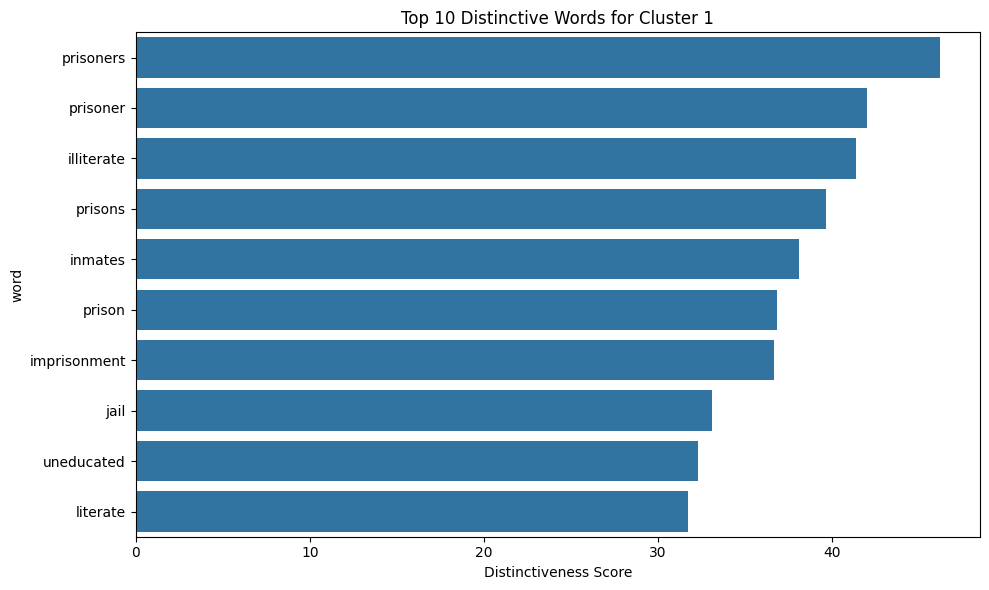

In [9]:
plot_distinctive_words_bar(1, distinctive_words)

In [10]:
# Get a random sample from cluster 1
cluster_0 = df[df["cluster"] == 1]
sample = cluster_0.sample(1).iloc[0]["prompt"]
print("Sample prompt from cluster 0:")
print(sample)

Sample prompt from cluster 0:
In many countries imprisonment is the most common solution to crimes. However, some people believe that better education will be a more effective solution. To what extent do you agree or disagree?


### Distinctive Words in Top Clusters

Showcase the most distinctive words across the largest clusters, providing a comparative view of thematic vocabulary.

In [15]:
def plot_distinctive_words_multiple_clusters(
    distinctive_words, clusters_to_plot=5, words_per_cluster=5
):
    # Select top clusters by size
    top_cluster_ids = (
        df["cluster"].value_counts().nlargest(clusters_to_plot).index.tolist()
    )

    # Create a DataFrame for plotting
    plot_data = []
    for cluster_id in top_cluster_ids:
        # Get example prompt for this cluster
        example_prompt = df[df["cluster"] == cluster_id]["prompt"].iloc[0]
        cluster_name = f"Cluster {cluster_id}: {example_prompt[:50]}..."

        # Get top words for this cluster
        for word, score in distinctive_words[cluster_id][:words_per_cluster]:
            plot_data.append({"cluster": cluster_name, "word": word, "score": score})

    plot_df = pd.DataFrame(plot_data)

    # Plot
    plt.figure(figsize=(12, 10))
    sns.barplot(x="score", y="word", hue="cluster", data=plot_df, palette="tab10")
    plt.title("Top Distinctive Words by Cluster")
    plt.xlabel("Distinctiveness Score")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

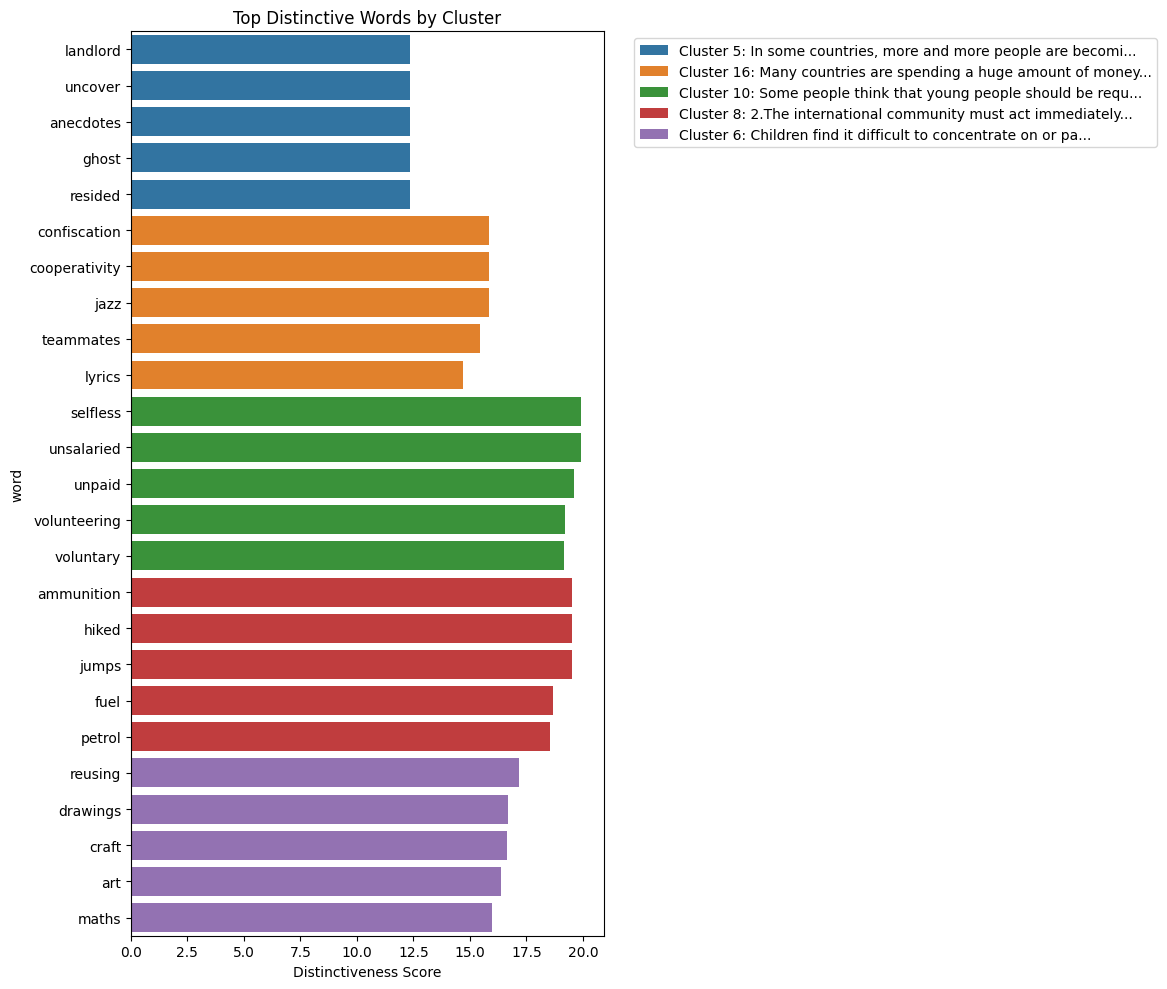

In [16]:
plot_distinctive_words_multiple_clusters(distinctive_words)

### Word Frequency Comparison Across Clusters

Compare the frequency of selected interesting words (e.g., "technology", "education", "children", "government", "environment") across the top clusters to reveal prompt-specific language patterns.

In [17]:
def plot_word_frequency_comparison(word_list, cluster_word_counts, top_n_clusters=10):
    # Select top clusters by size
    top_cluster_ids = (
        df["cluster"].value_counts().nlargest(top_n_clusters).index.tolist()
    )

    # Create DataFrame for plotting
    plot_data = []
    for cluster_id in top_cluster_ids:
        counts = cluster_word_counts[cluster_id]
        total_words = sum(counts.values())

        for word in word_list:
            freq = counts.get(word, 0) / total_words * 1000  # per 1000 words
            plot_data.append(
                {"cluster": f"Cluster {cluster_id}", "word": word, "frequency": freq}
            )

    plot_df = pd.DataFrame(plot_data)

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x="cluster", y="frequency", hue="word", data=plot_df, palette="Set2")
    plt.title("Word Frequency Comparison Across Clusters (per 1000 words)")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Word", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

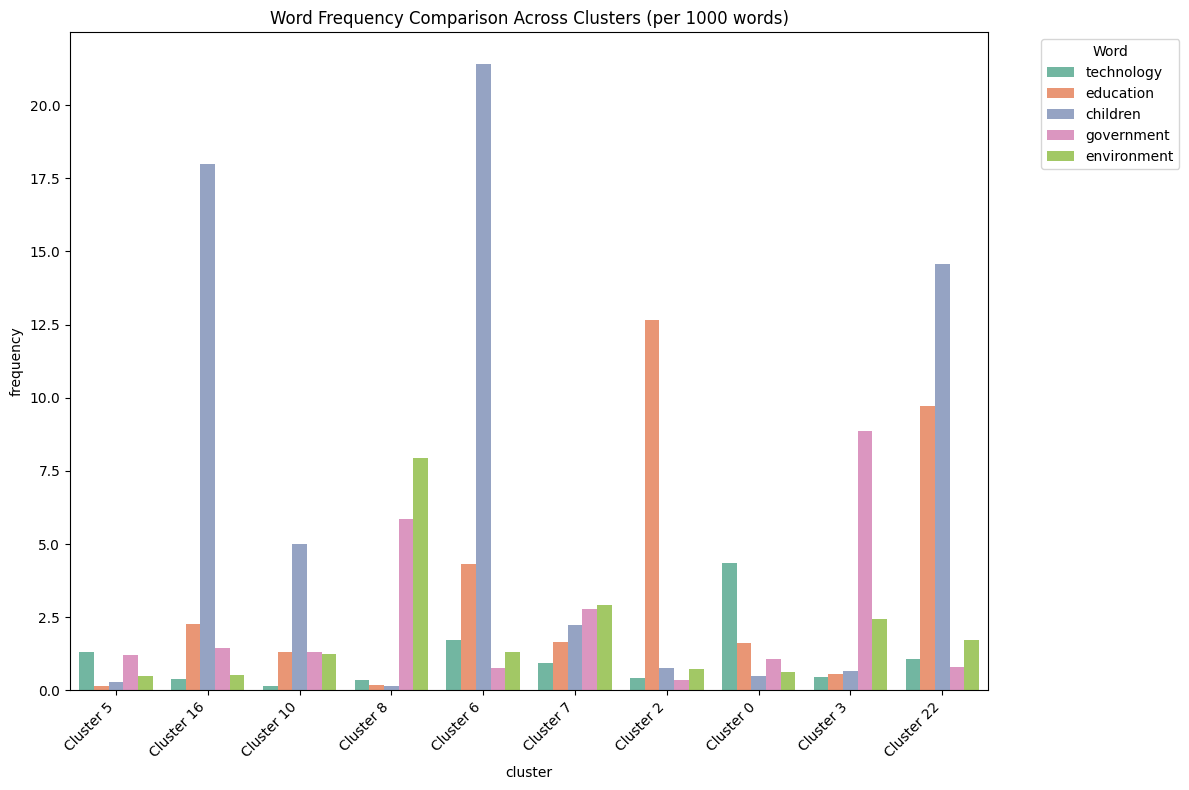

In [18]:
interesting_words = ["technology", "education", "children", "government", "environment"]
plot_word_frequency_comparison(interesting_words, cluster_word_counts)

### [`Click here to go back to the Homepage`](../Homepage.md)